## Aggregate the network with an optimization method

In [4]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('../src')

from utils import Config, DataProcessor, Network, find_matching_folder
from models import SpatialAggregation, TemporalAggregation
from visuals import Visualization

In [21]:
config1 = Config(demand = "total_demand", time_scale="yearly")
config2 = Config(demand = "total_demand", time_scale="monthly")
config3 = Config(demand = "total_demand", time_scale="weekly")

config4 = Config(demand = "k-interpolation", time_scale="yearly")
config5 = Config(demand = "k-interpolation", time_scale="monthly")
config6 = Config(demand = "k-interpolation", time_scale="weekly")


In [82]:
nodes_df2, demand_df2, wind_df2, solar_df2, wind_CF2, solar_CF2 = DataProcessor.import_and_interpolate_data(config2)

Number of duplicates deleted in nodes_df: 2238


In [84]:
pd.DataFrame(wind_CF2)

,0,1,2,3,4,5,6,7,8,9,...,376,377,378,379,380,381,382,383,384,385
0,1.000000,1.000000,0.840470,1.000000,1.000000,0.981383,1.000000,1.000000,0.240143,0.992586,...,0.584853,1.000000,0.000000,0.069859,0.878415,0.559134,0.029439,0.141445,0.468840,0.455537
1,1.000000,1.000000,0.954781,1.000000,1.000000,0.810889,1.000000,1.000000,0.226013,0.816060,...,0.190575,1.000000,0.000000,0.026644,0.541980,0.516094,0.020279,0.191836,0.313127,0.247766
2,1.000000,1.000000,0.982517,1.000000,1.000000,1.000000,1.000000,1.000000,0.198967,1.000000,...,0.108089,1.000000,0.000000,0.000000,0.226206,0.750056,0.066392,0.222608,0.000000,0.313413
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.922873,1.000000,0.112436,1.000000,...,0.155805,0.836954,0.024903,0.028523,0.026289,0.441116,0.144406,0.220190,0.000000,0.129069
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.628312,1.000000,0.115552,0.866659,...,0.113098,0.651301,0.068010,0.111424,0.000000,0.122387,0.131082,0.274160,0.000000,0.056831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.127017,0.131454,0.088083,0.120203,0.068923,0.047154,0.046287,0.062116,0.071015,0.089841,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049433
8756,0.174315,0.129924,0.292969,0.116967,0.108895,0.092538,0.110263,0.180990,0.056646,0.298219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053780
8757,0.046083,0.224698,0.353723,0.246804,0.283732,0.055012,0.389855,0.129556,0.027397,0.400513,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024831,0.089349
8758,0.157120,0.256685,0.393149,0.535573,0.391125,0.160226,0.038248,0.438535,0.000000,0.229671,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023861,0.076250


In [22]:
nodes_df1, demand_df1, wind_df1, solar_df1 = DataProcessor.import_and_interpolate_data(config1)
nodes_df2, demand_df2, wind_df2, solar_df2 = DataProcessor.import_and_interpolate_data(config2)
nodes_df3, demand_df3, wind_df3, solar_df3 = DataProcessor.import_and_interpolate_data(config3)

nodes_df4, demand_df4, wind_df4, solar_df4 = DataProcessor.import_and_interpolate_data(config4)
nodes_df5, demand_df5, wind_df5, solar_df5 = DataProcessor.import_and_interpolate_data(config5)
nodes_df6, demand_df6, wind_df6, solar_df6 = DataProcessor.import_and_interpolate_data(config6)

Number of duplicates deleted in nodes_df: 2238
Number of duplicates deleted in nodes_df: 2238
Number of duplicates deleted in nodes_df: 2238
Number of duplicates deleted in nodes_df: 2238
Number of duplicates deleted in nodes_df: 2238
Number of duplicates deleted in nodes_df: 2238


In [23]:
# Load CSV data
TimeSeries1 = {'wind': wind_df1, 'solar': solar_df1};
TimeSeries2 = {'wind': wind_df2, 'solar': solar_df2};
TimeSeries3 = {'wind': wind_df3, 'solar': solar_df3};

TimeSeries4 = {'wind': wind_df4, 'solar': solar_df4};
TimeSeries5 = {'wind': wind_df5, 'solar': solar_df5};
TimeSeries6 = {'wind': wind_df6, 'solar': solar_df6};

In [24]:
network1 = Network(nodes_df1, demand_df1, TimeSeries1, config1)
network2 = Network(nodes_df2, demand_df2, TimeSeries2, config2)
network3 = Network(nodes_df3, demand_df3, TimeSeries3, config3)

network4 = Network(nodes_df4, demand_df4, TimeSeries4, config4)
network5 = Network(nodes_df5, demand_df5, TimeSeries5, config5)
network6 = Network(nodes_df6, demand_df6, TimeSeries6, config6)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 2605).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of 

In [69]:
network2 = Network(nodes_df2, demand_df2, TimeSeries2, config2)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 2605).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of 

In [51]:
network2.demand

array([15.18785888, 14.29718709, 13.83891417, ..., 20.78731704,
       20.2806488 , 19.31723847])

In [55]:
network2.demand_series

2013-01-01 00:00:00    15.187859
2013-01-01 01:00:00    14.297187
2013-01-01 02:00:00    13.838914
2013-01-01 03:00:00    13.633731
2013-01-01 04:00:00    13.462247
                         ...    
2013-12-31 19:00:00    21.022615
2013-12-31 20:00:00    21.079591
2013-12-31 21:00:00    20.787317
2013-12-31 22:00:00    20.280649
2013-12-31 23:00:00    19.317238
Freq: h, Length: 8760, dtype: float64

In [79]:
config2

Config(year=2013, demand='total_demand', k_neighbors_CF=3, k_weight_demand=3, time_scale='monthly', drop_duplicates=True, n_repr=5, k_representative_days=5, weights={'position': 1.0, 'time_series': 1.0, 'duration_curves': 1.0, 'rdc': 1.0, 'intra_correlation': 1.0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 1.0}, file_paths={'nodes': '../DATA/dev/NewEngland-HVbuses.csv', 'demand': '../DATA/dev/demand_hist/county_demand_local_hourly_2013.csv', 'wind_cf': '../DATA/dev/CapacityFactors_ISONE/Wind/cf_Wind_0.22m_2013.nc', 'solar_cf': '../DATA/dev/CapacityFactors_ISONE/Solar/cf_Solar_0.22m_2013.nc', 'demand_lat_lon': '../DATA/Dev/new_england_counties2019.csv'})

In [78]:
solar_df2

,0,1,2,3,4,5,6,7,8,9,...,2595,2596,2597,2598,2599,2600,2601,2602,2603,2604
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.537122,0.537122,0.537122,0.537122,0.537122,0.537122,0.537122,0.537122,0.537122,0.537122,...,0.537122,0.537122,0.537123,0.537123,0.537123,0.537123,0.537123,0.537123,0.537123,0.537123
8756,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,...,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086
8757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
network2.series

2013-01-01 00:00:00    0.000000
2013-01-01 01:00:00    0.000000
2013-01-01 02:00:00    0.000000
2013-01-01 03:00:00    0.000000
2013-01-01 04:00:00    0.000000
                         ...   
2013-12-31 19:00:00    0.537123
2013-12-31 20:00:00    0.017086
2013-12-31 21:00:00    0.000000
2013-12-31 22:00:00    0.000000
2013-12-31 23:00:00    0.000000
Freq: h, Name: 2604, Length: 8760, dtype: float64

In [75]:
for node in range(3):
    print("Node", node)
    print(network2.features[node]['supply_demand_mismatch']['wind'])
    print(network2.series[node]['wind'])
    print(network2.monthly[node]['wind'])
    print(network2.monthly_corr[node]['wind'])
    



Node 0
[-0.08120195  0.04567096  0.19750482 -0.1713726  -0.129312   -0.11978033
 -0.22387598  0.02975469 -0.11953537 -0.0624373   0.01142871 -0.12280023]
2013-01-01 00:00:00    0.494479
2013-01-01 01:00:00    0.358932
2013-01-01 02:00:00    0.354400
2013-01-01 03:00:00    0.189995
2013-01-01 04:00:00    0.059726
                         ...   
2013-12-31 19:00:00    0.016491
2013-12-31 20:00:00    0.017941
2013-12-31 21:00:00    0.038082
2013-12-31 22:00:00    0.033390
2013-12-31 23:00:00    0.038666
Freq: h, Name: 0, Length: 8760, dtype: float64
[-0.081201951919792, 0.045670957450888686, 0.1975048194658655, -0.17137260451569747, -0.12931200116077368, -0.1197803259492116, -0.22387598296371414, 0.0297546941007039, -0.11953536795663572, -0.06243729521595411, 0.011428714987085734, -0.12280023347419813]
Node 1
[-0.08120181  0.0456709   0.1975047  -0.1713725  -0.12931183 -0.11978014
 -0.22387572  0.02975486 -0.11953522 -0.06243709  0.0114289  -0.12280027]
2013-01-01 00:00:00    0.494479
201

In [61]:
for time, group in network2.monthly:
    print(f"Month: {time}")
    correlation = group.corr(network2.demand_series[group.index])
    print(correlation)
    


Month: 1
0.2787779805541379
Month: 2
0.2543181077789691
Month: 3
0.2147418259910828
Month: 4
0.5476407835563388
Month: 5
0.5315260177706205
Month: 6
0.5169312268430624
Month: 7
0.7067669116045222
Month: 8
0.41129843428542034
Month: 9
0.33339236211876966
Month: 10
0.35191154540453573
Month: 11
0.28651213651020413
Month: 12
0.25323110084784906


In [36]:
network2.demand_df

,23029,9003,9013,9015,25019,50027,33019,33001,33005,33017,...,23009,25001,23011,9007,9001,33007,50005,50009,25005,33009
0,0.034198,0.752331,0.146374,0.098516,0.006526,0.082408,0.045949,0.068039,0.068009,0.116370,...,0.101075,0.166236,0.098566,0.155454,0.793873,0.030499,0.029606,0.014866,0.594369,0.100564
1,0.032193,0.708212,0.137790,0.092738,0.006143,0.077575,0.043255,0.064049,0.064021,0.109546,...,0.095147,0.156487,0.092785,0.146338,0.747317,0.028711,0.027870,0.013994,0.559513,0.094666
2,0.031161,0.685511,0.133374,0.089766,0.005946,0.075089,0.041868,0.061996,0.061969,0.106034,...,0.092097,0.151471,0.089811,0.141647,0.723363,0.027790,0.026977,0.013545,0.541579,0.091632
3,0.030699,0.675347,0.131396,0.088435,0.005858,0.073975,0.041248,0.061077,0.061050,0.104462,...,0.090732,0.149225,0.088480,0.139547,0.712638,0.027378,0.026577,0.013344,0.533549,0.090273
4,0.030313,0.666853,0.129744,0.087323,0.005784,0.073045,0.040729,0.060309,0.060282,0.103148,...,0.089591,0.147348,0.087367,0.137792,0.703674,0.027034,0.026243,0.013177,0.526838,0.089138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.047337,1.041356,0.202607,0.136363,0.009033,0.114067,0.063602,0.094178,0.094136,0.161076,...,0.139905,0.230099,0.136432,0.215175,1.098856,0.042216,0.040980,0.020577,0.822709,0.139198
8756,0.047465,1.044178,0.203156,0.136732,0.009057,0.114376,0.063774,0.094434,0.094392,0.161513,...,0.140284,0.230722,0.136802,0.215758,1.101835,0.042331,0.041091,0.020632,0.824939,0.139575
8757,0.046807,1.029700,0.200340,0.134836,0.008932,0.112790,0.062890,0.093124,0.093083,0.159273,...,0.138339,0.227523,0.134905,0.212767,1.086557,0.041744,0.040522,0.020346,0.813501,0.137640
8758,0.045666,1.004602,0.195457,0.131550,0.008714,0.110041,0.061357,0.090854,0.090814,0.155391,...,0.134967,0.221978,0.131617,0.207581,1.060074,0.040726,0.039534,0.019850,0.793673,0.134285


In [44]:
pd.DataFrame(wind_correlations)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.081202,0.045671,0.197505,-0.171373,-0.129312,-0.119780,-0.223876,0.029755,-0.119535,-0.062437,0.011429,-0.1228
1,-0.081202,0.045671,0.197505,-0.171373,-0.129312,-0.119780,-0.223876,0.029755,-0.119535,-0.062437,0.011429,-0.1228
2,-0.081202,0.045671,0.197505,-0.171373,-0.129312,-0.119780,-0.223876,0.029755,-0.119535,-0.062437,0.011429,-0.1228
3,-0.081202,0.045671,0.197505,-0.171373,-0.129312,-0.119780,-0.223876,0.029755,-0.119535,-0.062437,0.011429,-0.1228
4,-0.081202,0.045671,0.197505,-0.171373,-0.129312,-0.119780,-0.223876,0.029755,-0.119535,-0.062437,0.011429,-0.1228
...,...,...,...,...,...,...,...,...,...,...,...,...
2600,-0.081204,0.045671,0.197507,-0.171374,-0.129314,-0.119782,-0.223879,0.029753,-0.119537,-0.062440,0.011427,-0.1228
2601,-0.081204,0.045672,0.197507,-0.171374,-0.129314,-0.119783,-0.223879,0.029753,-0.119538,-0.062440,0.011426,-0.1228
2602,-0.081203,0.045671,0.197506,-0.171374,-0.129314,-0.119782,-0.223879,0.029753,-0.119537,-0.062439,0.011427,-0.1228
2603,-0.081203,0.045671,0.197506,-0.171373,-0.129314,-0.119782,-0.223878,0.029753,-0.119537,-0.062439,0.011427,-0.1228


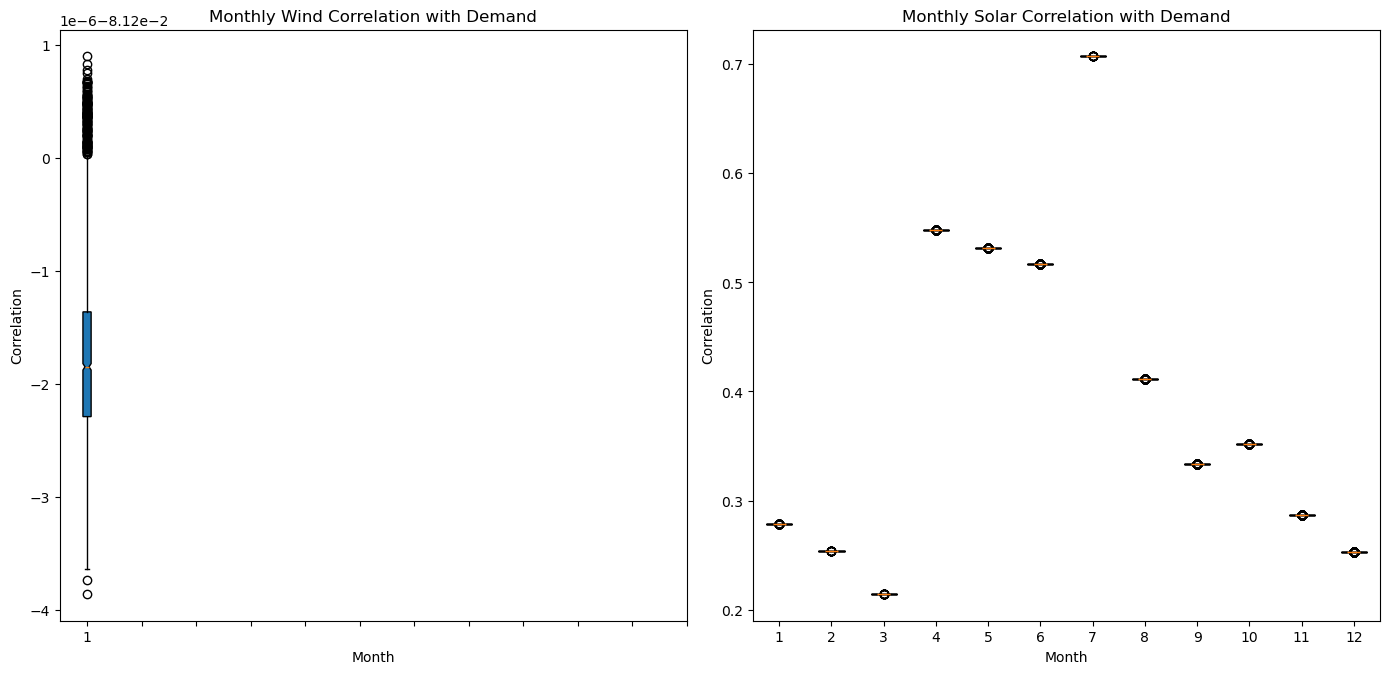

In [77]:


network = network2
wind_correlations = []
solar_correlations = []

for node in range(len(network.features)):
    wind_correlations.append(network.features[node]['supply_demand_mismatch']['wind'])
    solar_correlations.append(network.features[node]['supply_demand_mismatch']['solar'])

# Convert to numpy arrays for easier manipulation
wind_correlations = np.array(wind_correlations)
solar_correlations = np.array(solar_correlations)

# Create the box plot
plt.figure(figsize=(14, 7))

# Plot wind correlations
plt.subplot(1, 2, 1)
plt.boxplot(wind_correlations[:,0], notch=True, patch_artist=True)
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.title('Monthly Wind Correlation with Demand')
plt.xticks(ticks=np.arange(1, 13))

# Plot solar correlations
plt.subplot(1, 2, 2)
plt.boxplot(solar_correlations, notch=True, patch_artist=True)
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.title('Monthly Solar Correlation with Demand')
plt.xticks(ticks=np.arange(1, 13))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
network2.features[0]["supply_demand_mismatch"]['wind']
network2.features[0]["supply_demand_mismatch"]['solar']

(12,)

In [39]:
len(network2.features)

2605

In [10]:
aggregator = SpatialAggregation(network.features, config)

In [11]:
load = {"yes": "2025-02-05 18h51 - Distance Metrics", "no": None}
aggregator.set_distance_metrics(dir_distance_metrics = load["yes"])

In [12]:
print(aggregator.distance_metrics.keys())

dict_keys(['duration_curves_distance', 'inter_correlation_distance', 'intra_correlation_distance', 'metadata', 'position_distance', 'rdc_distance', 'supply_demand_mismatch_distance', 'time_series_distance'])


In [43]:
optimized_assignment_dict = aggregator.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6788631 rows, 6788630 columns and 20360680 nonzeros
Model fingerprint: 0x4427af3e
Variable types: 0 continuous, 6788630 integer (6788630 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-07, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve removed 0 rows and 0 columns (presolve time = 10s) ...
Presolve removed 0 rows and 0 columns (presolve time = 15s) ...
Presolve removed 0 rows and 0 columns (presolve time = 20s) ...
Presolve removed 0 rows and 0 columns (presolve time = 25s) ...
Presolve removed 0 rows and 0 columns (presolve time = 30s) ...
Presolve removed 0 rows and 0 columns (pres

GurobiError: Out of memory

In [13]:
cluster_assignment_dict = aggregator.cluster_KMedoids()

Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 1.0, 'time_series': 1.0, 'duration_curves': 1.0, 'rdc': 1.0, 'intra_correlation': 1.0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 1.0}


In [15]:
eval_KMedoids = aggregator.compute_eval_metrics(aggregation_method = 'kmedoids', type="custom")

In [ ]:
eval_opti = aggregator.compute_eval_metrics(aggregation_method = 'optimization', type="custom")

In [16]:
visualizer = Visualization(aggregator)

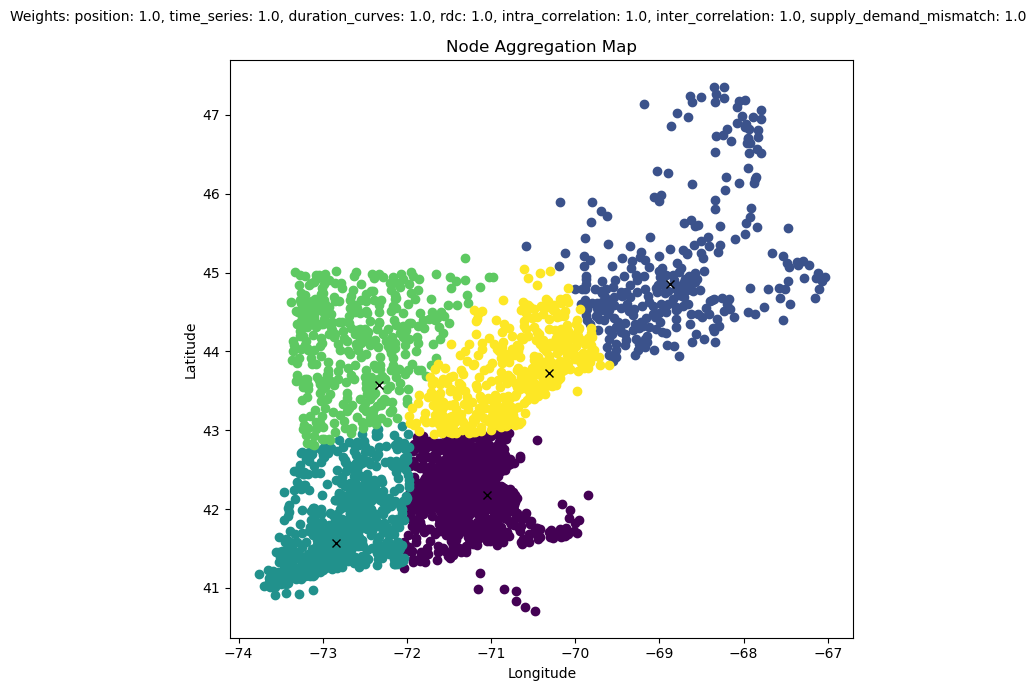

In [17]:
visualizer.plot_map(aggregation_method='kmedoids')

In [ ]:
visualizer.plot_map(aggregation_method='optimization')

In [66]:
print('kmedoids')
print('- Number of clusters: ', len(cluster_centers))
print('- Representatives: ', cluster_centers)
print('- Number of nodes in each cluster:')
for i in range(len(cluster_centers)):
    print(f'  Cluster {i}: {len(cluster_assignment_dict[i])} nodes')

print("optimization")
print('- Number of clusters: ', len(opti_rep))
print('- Representatives: ', opti_rep)
print('- Number of nodes in each cluster:')
for i in range(len(opti_rep)):
    print(f'  Cluster {i}: {int(assignment_matrix_result[:, opti_rep[i]].sum())} nodes')

kmedoids
- Number of clusters:  5
- Representatives:  [113, 1015, 2578, 674, 1825]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 227 nodes
  Cluster 2: 647 nodes
  Cluster 3: 327 nodes
  Cluster 4: 765 nodes
optimization
- Number of clusters:  5
- Representatives:  [113, 672, 1015, 1825, 2578]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 325 nodes
  Cluster 2: 229 nodes
  Cluster 3: 765 nodes
  Cluster 4: 647 nodes


In [91]:
for i in range(5):
    cluster_assignment_dict.pop(i)

In [18]:
temp = TemporalAggregation(aggregator,cluster_assignment_dict)

In [19]:
a = temp.aggregate()

Representative days: [114, 136, 172, 246, 295]
